In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import median_filter
from skimage.filters import unsharp_mask
import cv2

import os
os.chdir("../")
from Sources.tools import *

# Load data

In [2]:
breast_images_without_label = np.load('Data/images_without_label_1_step_morpho.npy', allow_pickle=True)

# Apply filters

In [4]:
image = breast_images_without_label[6]

## Median Filter

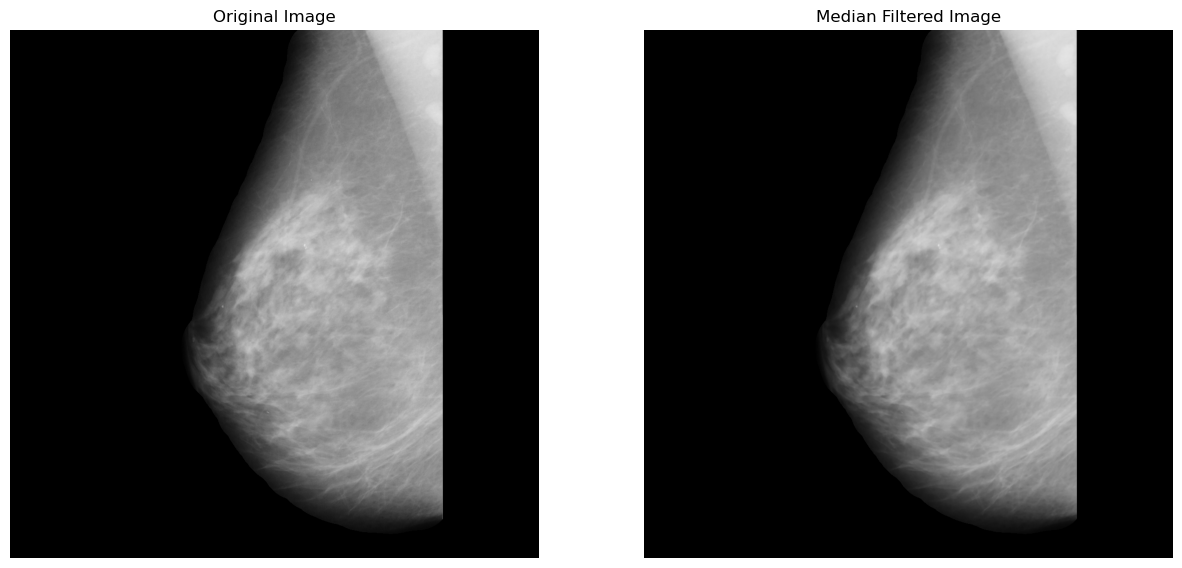

In [10]:
# Appliquer un filtre médian
filtered_image = median_filter(image, size=3)  # Taille de la fenêtre = 3x3

# Afficher l'image avant et après
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Median Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()

## CLAHE

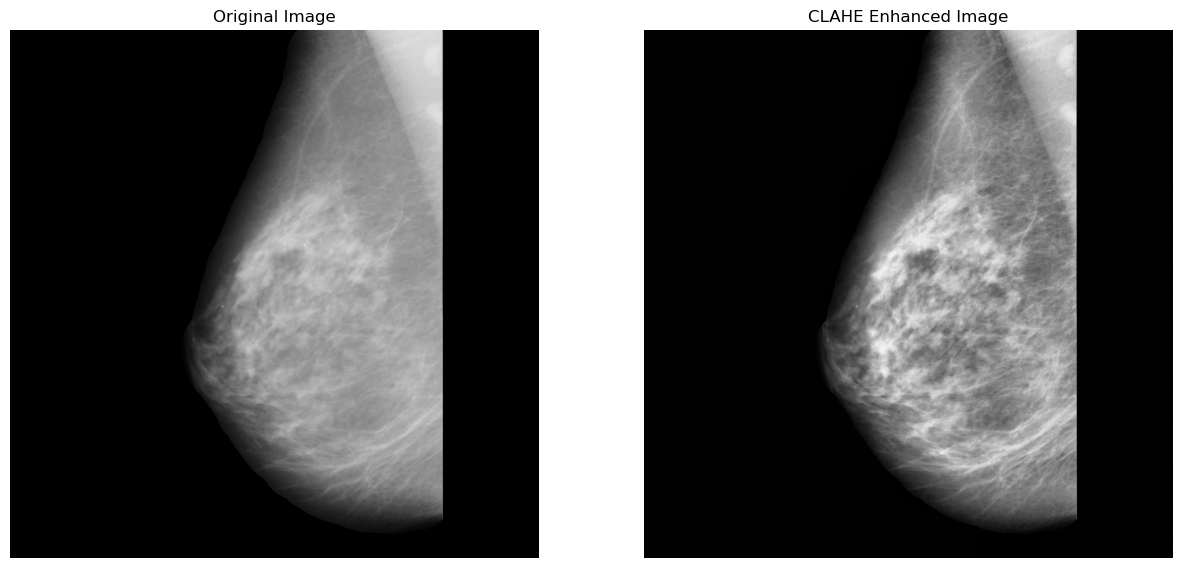

In [11]:
# Create a CLAHE object (clipLimit=2.0 and tileGridSize=(8,8) are common default values)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(image)

# Display the original and enhanced image
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("CLAHE Enhanced Image")
plt.imshow(clahe_image, cmap="gray")
plt.axis("off")

plt.show()

In [16]:
def apply_clahe_filter(image):
    # Create a CLAHE object (clipLimit=2.0 and tileGridSize=(8,8) are common default values)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(image)

    return clahe_image

In [18]:
breast_images_clahe = []

for i in tqdm(range(breast_images_without_label.shape[0])):
    clahe_image = apply_clahe_filter(breast_images_without_label[i])

    breast_images_clahe += [clahe_image]

100%|██████████| 322/322 [00:00<00:00, 1728.03it/s]


## Unsharp masking

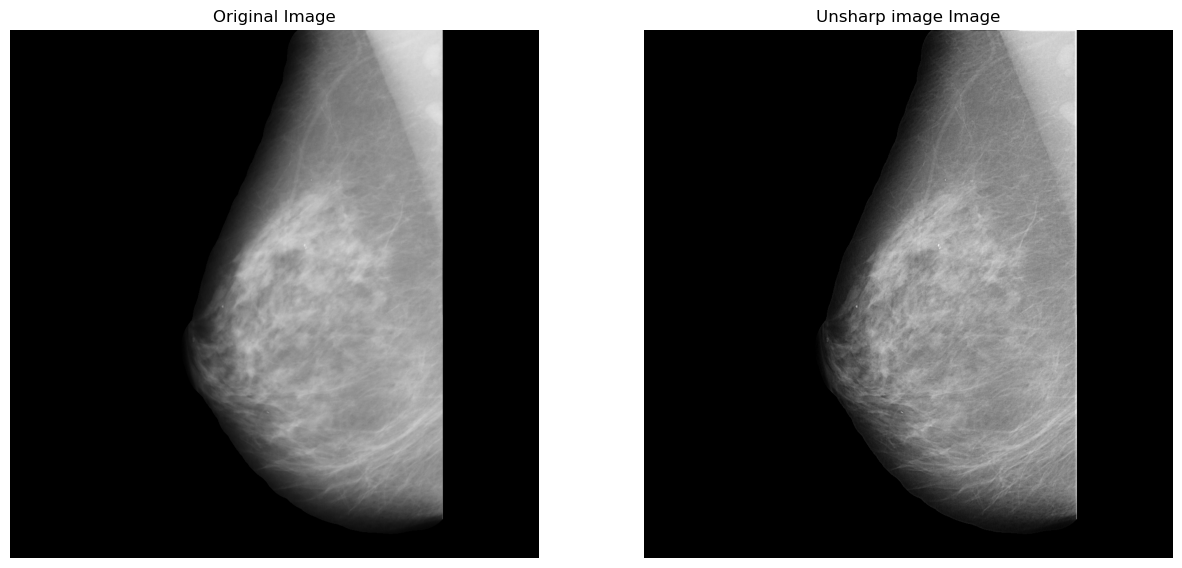

In [14]:
# Apply unsharp masking
sharpened_image = unsharp_mask(image, radius=2, amount=1.5)

# Display the original and enhanced image
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Unsharp image Image")
plt.imshow(sharpened_image, cmap="gray")
plt.axis("off")

plt.show()

# Combination of filters

## MF&CLAHE

## MF&USM

## CLAHE&USM

## MF&CLAHE&USM